In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [19]:
# Load the data
sentiment = pd.read_csv('csv_files/bitcoin_sentiment.csv')
traders = pd.read_csv('csv_files/trader_data.csv')


In [20]:
print("Sentiment Data Overview:")
print(f"Shape: {sentiment.shape}")
print("\nTraders Data Overview:")
print(f"Shape: {traders.shape}")


Sentiment Data Overview:
Shape: (211224, 16)

Traders Data Overview:
Shape: (2644, 4)


 DATA CLEANING 

In [21]:
# Clean sentiment data
print("\nSentiment Data Info:")
print(sentiment.info())
print("\nMissing values in sentiment data:")
print(sentiment.isnull().sum())


Sentiment Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dty

In [22]:
# Convert timestamp columns
sentiment['Timestamp'] = pd.to_datetime(sentiment['Timestamp'], errors='coerce')
sentiment['Timestamp IST'] = pd.to_datetime(sentiment['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

In [23]:
# Clean numeric columns
numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'Fee']
for col in numeric_cols:
    sentiment[col] = pd.to_numeric(sentiment[col], errors='coerce')

In [24]:
# Clean traders data
print("\nTraders Data Info:")
print(traders.info())
traders['date'] = pd.to_datetime(traders['date'])
traders['timestamp'] = pd.to_datetime(traders['timestamp'], unit='s')



Traders Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None


In [25]:
print("\nBasic Statistics:")
print("\nSentiment Data Description:")
print(sentiment[['Execution Price', 'Size USD', 'Closed PnL', 'Fee']].describe())


Basic Statistics:

Sentiment Data Description:
       Execution Price      Size USD     Closed PnL            Fee
count    211224.000000  2.112240e+05  211224.000000  211224.000000
mean      11414.723350  5.639451e+03      48.749001       1.163967
std       29447.654868  3.657514e+04     919.164828       6.758854
min           0.000005  0.000000e+00 -117990.104100      -1.175712
25%           4.854700  1.937900e+02       0.000000       0.016121
50%          18.280000  5.970450e+02       0.000000       0.089578
75%         101.580000  2.058960e+03       5.792797       0.393811
max      109004.000000  3.921431e+06  135329.090100     837.471593


In [26]:
print("\nTraders Data Description:")
print(traders[['value']].describe())
print("\nSentiment Classification Distribution:")
print(traders['classification'].value_counts())


Traders Data Description:
             value
count  2644.000000
mean     46.981089
std      21.827680
min       5.000000
25%      28.000000
50%      46.000000
75%      66.000000
max      95.000000

Sentiment Classification Distribution:
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


EXPLORATORY DATA ANALYSIS

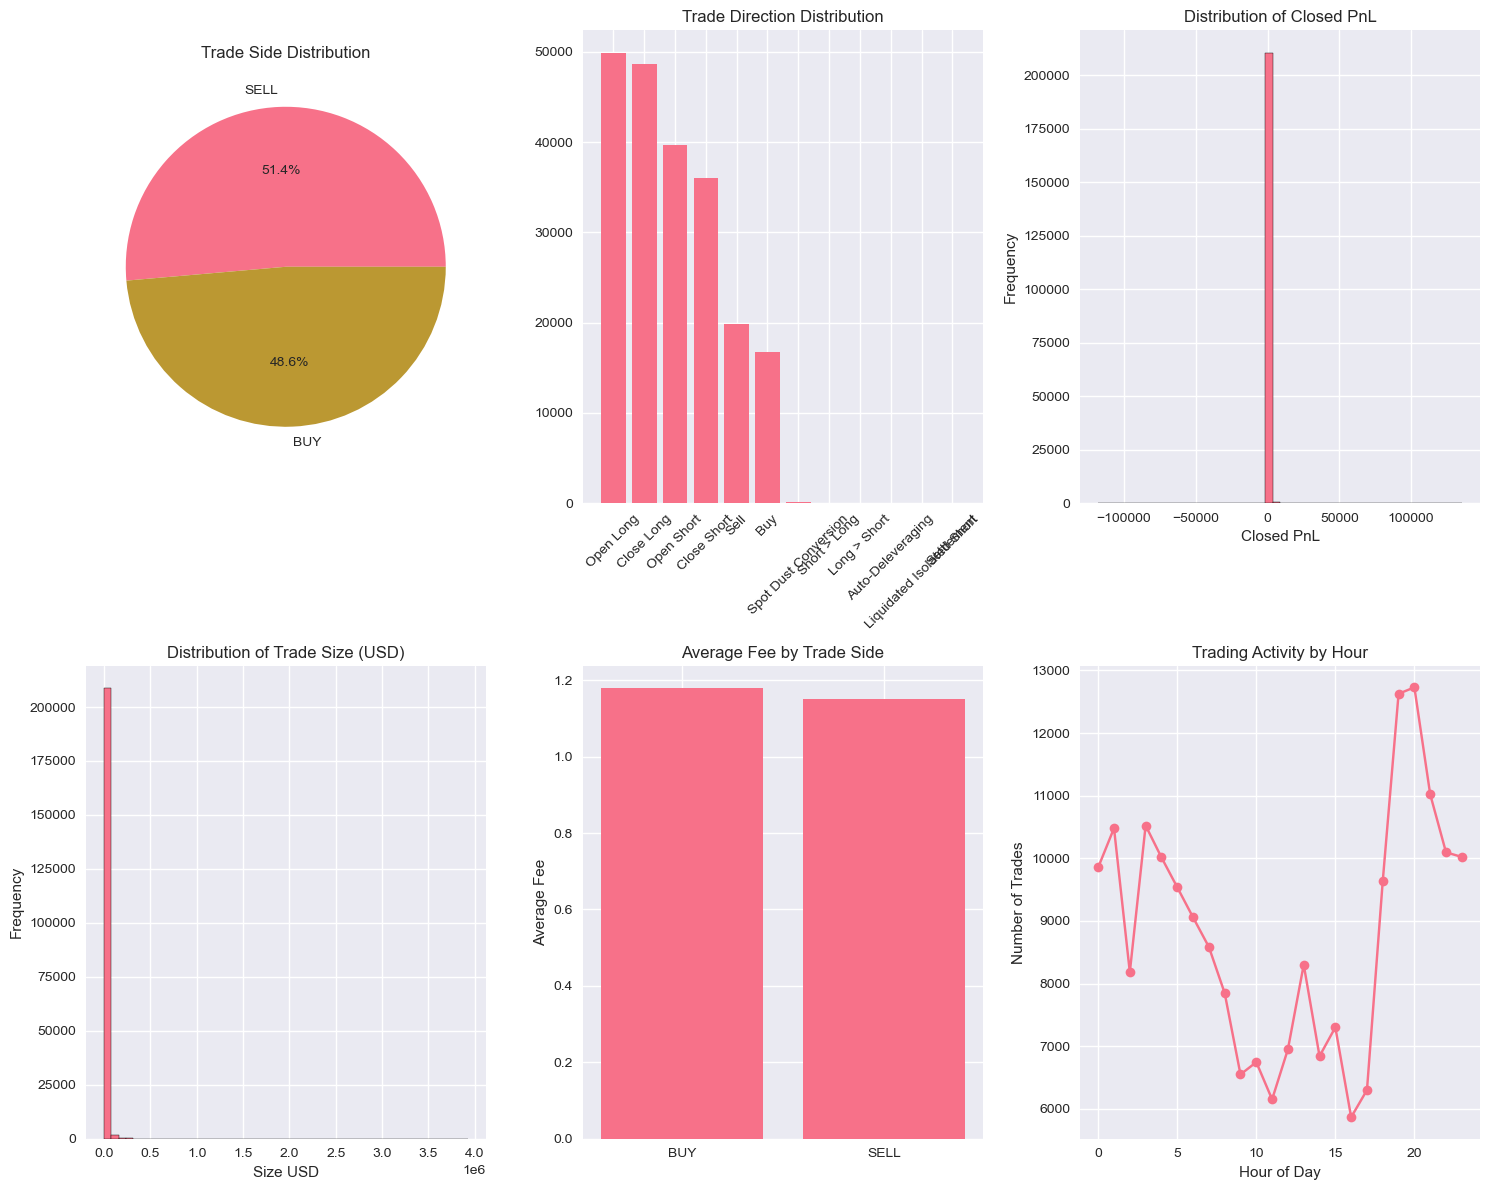

In [42]:
# 1. Sentiment Data EDA
plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
side_dist = sentiment['Side'].value_counts()
plt.pie(side_dist.values, labels=side_dist.index, autopct='%1.1f%%')
plt.title('Trade Side Distribution')

plt.subplot(2, 3, 2)
direction_dist = sentiment['Direction'].value_counts()
plt.bar(direction_dist.index, direction_dist.values)
plt.title('Trade Direction Distribution')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
plt.hist(sentiment['Closed PnL'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of Closed PnL')
plt.xlabel('Closed PnL')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.hist(sentiment['Size USD'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of Trade Size (USD)')
plt.xlabel('Size USD')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
fee_analysis = sentiment.groupby('Side')['Fee'].mean()
plt.bar(fee_analysis.index, fee_analysis.values)
plt.title('Average Fee by Trade Side')
plt.ylabel('Average Fee')

plt.subplot(2, 3, 6)
hourly_trades = sentiment['Timestamp IST'].dt.hour.value_counts().sort_index()
plt.plot(hourly_trades.index, hourly_trades.values, marker='o')
plt.title('Trading Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trades')

plt.tight_layout()
plt.savefig('outputs/eda_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

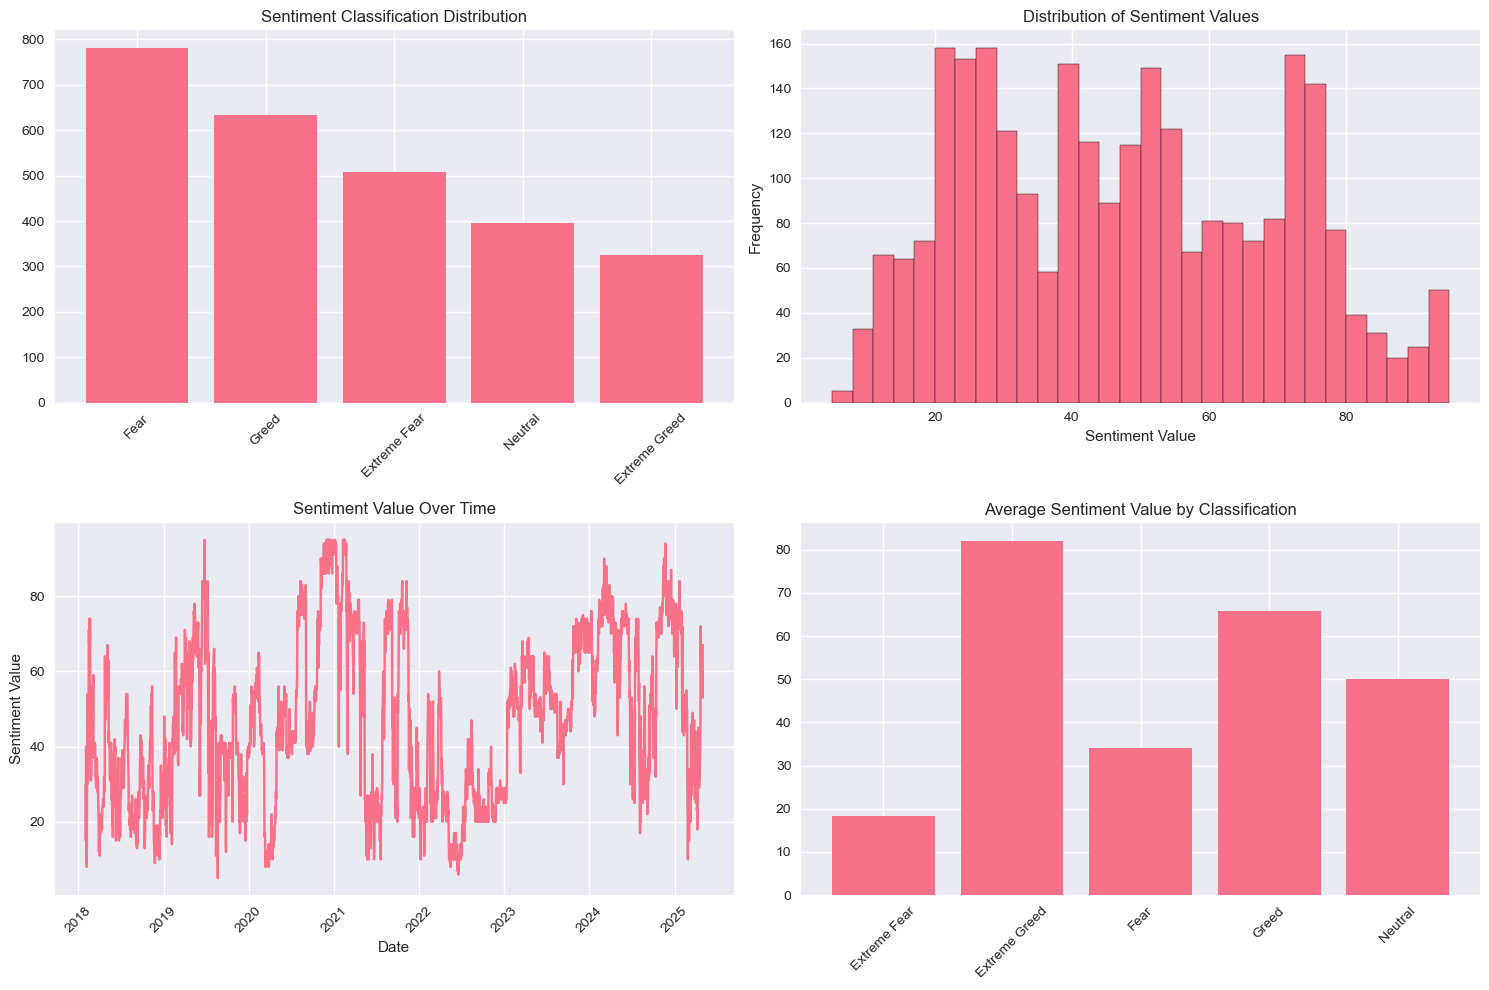

In [43]:
# 2. Traders Data EDA
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
classification_count = traders['classification'].value_counts()
plt.bar(classification_count.index, classification_count.values)
plt.title('Sentiment Classification Distribution')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.hist(traders['value'], bins=30, edgecolor='black')
plt.title('Distribution of Sentiment Values')
plt.xlabel('Sentiment Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
traders_sorted = traders.sort_values('date')
plt.plot(traders_sorted['date'], traders_sorted['value'])
plt.title('Sentiment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Value')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sentiment_by_class = traders.groupby('classification')['value'].mean()
plt.bar(sentiment_by_class.index, sentiment_by_class.values)
plt.title('Average Sentiment Value by Classification')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('outputs/eda_trader.png', dpi=300, bbox_inches='tight')
plt.show()

ADVANCED ANALYSIS

In [44]:
# Prepare data for integration
sentiment['date'] = sentiment['Timestamp IST'].dt.date
sentiment['date'] = pd.to_datetime(sentiment['date'])

In [45]:
# Aggregate sentiment data by date
daily_sentiment = sentiment.groupby('date').agg({
    'Closed PnL': 'sum',
    'Size USD': 'sum',
    'Fee': 'sum',
    'Account': 'count'
}).rename(columns={'Account': 'Trade_Count'}).reset_index()

In [46]:
# Merge with traders data
traders['date_only'] = traders['date'].dt.date
traders['date_only'] = pd.to_datetime(traders['date_only'])

In [47]:
merged_data = pd.merge(daily_sentiment, traders, left_on='date', right_on='date_only', how='inner')

In [48]:
print(f"Merged data shape: {merged_data.shape}")
print("\nMerged data sample:")
print(merged_data.head())

Merged data shape: (479, 10)

Merged data sample:
      date_x  Closed PnL   Size USD        Fee  Trade_Count  \
0 2023-05-01    0.000000     477.00   0.000000            3   
1 2023-12-05    0.000000   50005.83  12.501455            9   
2 2023-12-14 -205.434737  113203.35  28.300831           11   
3 2023-12-15  -24.632034   10609.95   2.652489            2   
4 2023-12-16    0.000000   15348.77   3.837189            3   

            timestamp  value classification     date_y  date_only  
0 2023-05-01 05:30:00     63          Greed 2023-05-01 2023-05-01  
1 2023-12-05 05:30:00     75  Extreme Greed 2023-12-05 2023-12-05  
2 2023-12-14 05:30:00     72          Greed 2023-12-14 2023-12-14  
3 2023-12-15 05:30:00     70          Greed 2023-12-15 2023-12-15  
4 2023-12-16 05:30:00     67          Greed 2023-12-16 2023-12-16  


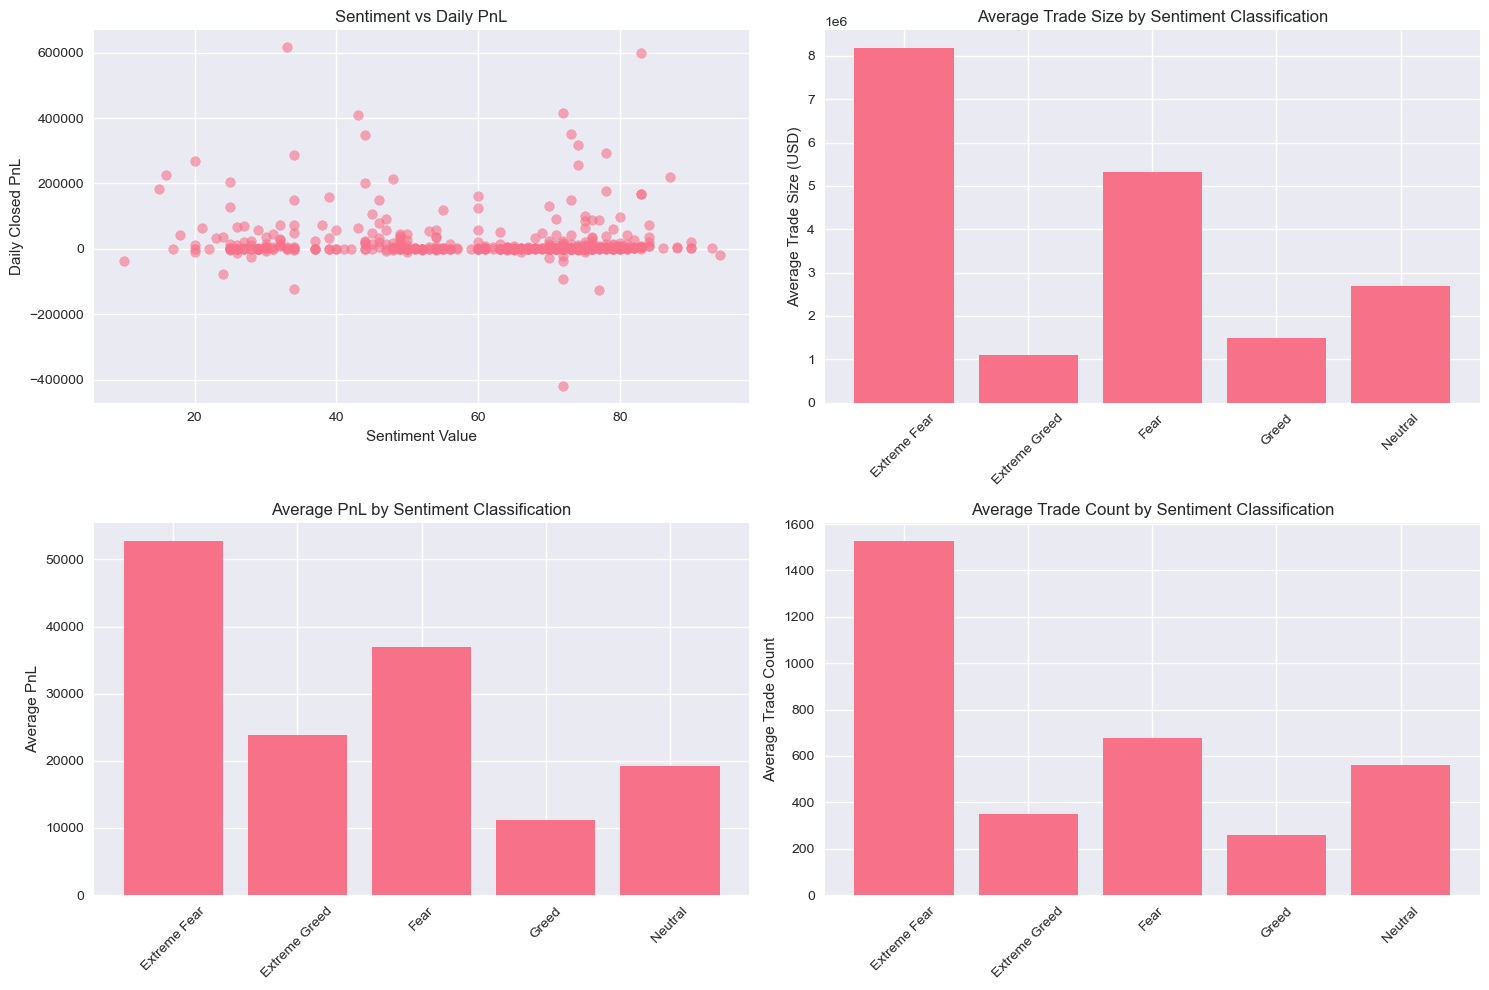

In [49]:
# 3. Sentiment vs PnL Analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(merged_data['value'], merged_data['Closed PnL'], alpha=0.6)
plt.xlabel('Sentiment Value')
plt.ylabel('Daily Closed PnL')
plt.title('Sentiment vs Daily PnL')

plt.subplot(2, 2, 2)
sentiment_vs_trade_size = merged_data.groupby('classification')['Size USD'].mean()
plt.bar(sentiment_vs_trade_size.index, sentiment_vs_trade_size.values)
plt.title('Average Trade Size by Sentiment Classification')
plt.xticks(rotation=45)
plt.ylabel('Average Trade Size (USD)')

plt.subplot(2, 2, 3)
pnl_by_sentiment = merged_data.groupby('classification')['Closed PnL'].mean()
plt.bar(pnl_by_sentiment.index, pnl_by_sentiment.values)
plt.title('Average PnL by Sentiment Classification')
plt.xticks(rotation=45)
plt.ylabel('Average PnL')

plt.subplot(2, 2, 4)
trade_count_by_sentiment = merged_data.groupby('classification')['Trade_Count'].mean()
plt.bar(trade_count_by_sentiment.index, trade_count_by_sentiment.values)
plt.title('Average Trade Count by Sentiment Classification')
plt.xticks(rotation=45)
plt.ylabel('Average Trade Count')

plt.tight_layout()
plt.savefig('outputs/sentiment_vs_pnl.png', dpi=300, bbox_inches='tight')
plt.show()

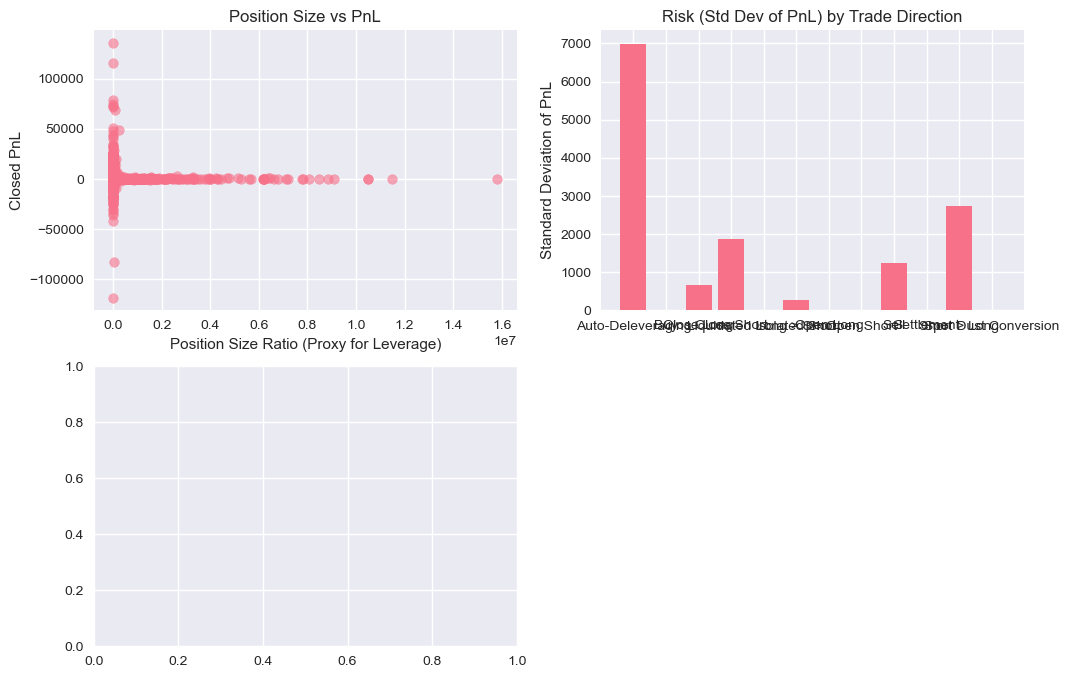

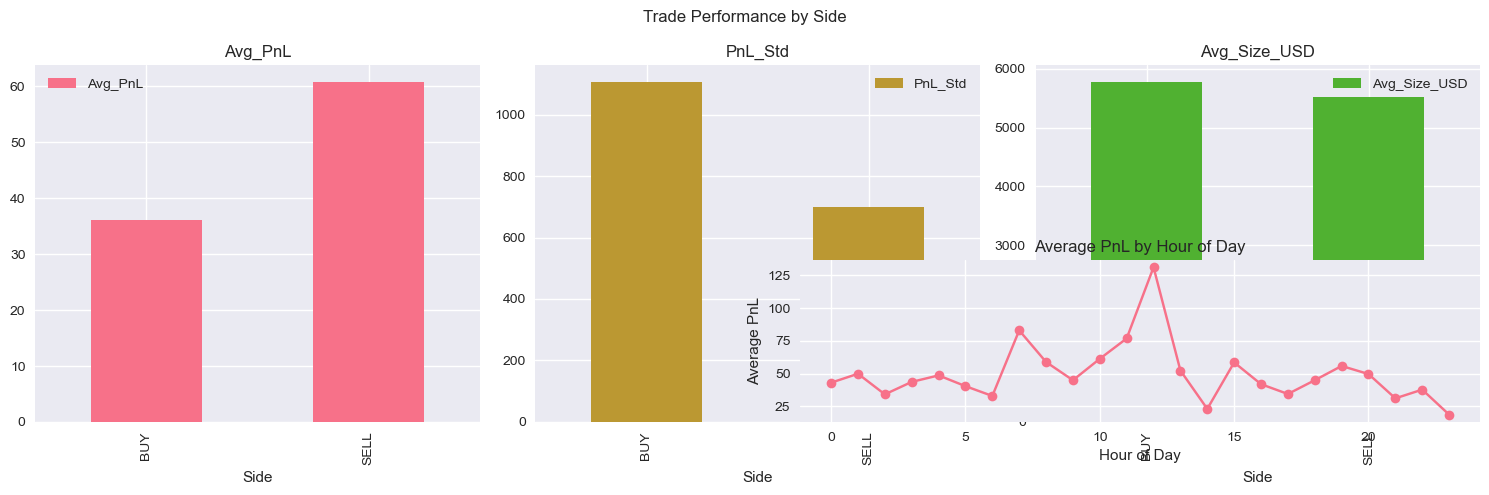

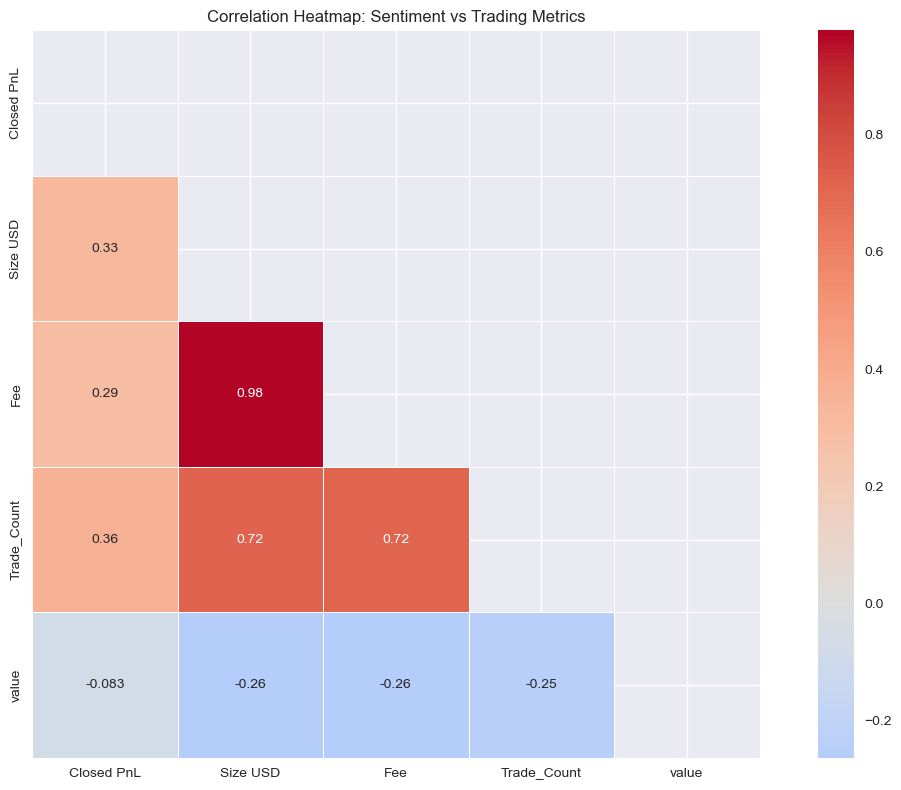

In [51]:
# 4. Leverage and Risk Analysis (using Size as proxy for leverage)
plt.figure(figsize=(12, 8))

# Calculate position size relative metrics
sentiment['position_size_ratio'] = sentiment['Size USD'] / sentiment['Execution Price']

plt.subplot(2, 2, 1)
plt.scatter(sentiment['position_size_ratio'], sentiment['Closed PnL'], alpha=0.6)
plt.xlabel('Position Size Ratio (Proxy for Leverage)')
plt.ylabel('Closed PnL')
plt.title('Position Size vs PnL')

plt.subplot(2, 2, 2)
risk_reward = sentiment.groupby('Direction')['Closed PnL'].std()
plt.bar(risk_reward.index, risk_reward.values)
plt.title('Risk (Std Dev of PnL) by Trade Direction')
plt.ylabel('Standard Deviation of PnL')

plt.subplot(2, 2, 3)
side_analysis = sentiment.groupby('Side').agg({
    'Closed PnL': ['mean', 'std'],
    'Size USD': 'mean'
})
side_analysis.columns = ['Avg_PnL', 'PnL_Std', 'Avg_Size_USD']
side_analysis.plot(kind='bar', subplots=True, layout=(1, 3), figsize=(15, 5))
plt.suptitle('Trade Performance by Side')
plt.tight_layout()

plt.subplot(2, 2, 4)
hourly_performance = sentiment.groupby(sentiment['Timestamp IST'].dt.hour)['Closed PnL'].mean()
plt.plot(hourly_performance.index, hourly_performance.values, marker='o')
plt.title('Average PnL by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average PnL')

plt.tight_layout()
plt.savefig('outputs/leverage_vs_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Correlation Analysis
plt.figure(figsize=(12, 8))

# Select numeric columns for correlation
numeric_merged = merged_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_merged.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap: Sentiment vs Trading Metrics')
plt.tight_layout()
plt.savefig('outputs/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

STATISTICAL ANALYSIS

In [52]:
from scipy import stats

In [53]:
# Test correlation between sentiment and PnL
if len(merged_data) > 1:
    corr_coef, p_value = stats.pearsonr(merged_data['value'].dropna(), 
                                       merged_data['Closed PnL'].dropna())
    print(f"Correlation between sentiment value and PnL: {corr_coef:.3f} (p-value: {p_value:.3f})")


Correlation between sentiment value and PnL: -0.083 (p-value: 0.071)


In [54]:
# Performance by sentiment classification
print("\nPerformance by Sentiment Classification:")
performance_summary = merged_data.groupby('classification').agg({
    'Closed PnL': ['mean', 'std', 'count'],
    'Trade_Count': 'mean',
    'Size USD': 'mean'
}).round(2)
print(performance_summary)


Performance by Sentiment Classification:
               Closed PnL                  Trade_Count    Size USD
                     mean        std count        mean        mean
classification                                                    
Extreme Fear     52793.59  101262.39    14     1528.57  8177447.25
Extreme Greed    23817.29   72827.30   114      350.81  1091799.69
Fear             36891.82   96611.85    91      679.53  5311261.43
Greed            11140.57   62427.96   193      260.64  1495246.09
Neutral          19297.32   37995.21    67      562.48  2690180.05


In [55]:
# Risk Analysis
print("\nRisk Analysis by Trade Direction:")
risk_analysis = sentiment.groupby('Direction').agg({
    'Closed PnL': ['mean', 'std', 'count'],
    'Size USD': 'mean'
}).round(2)
print(risk_analysis)


Risk Analysis by Trade Direction:
                          Closed PnL                  Size USD
                                mean      std  count      mean
Direction                                                     
Auto-Deleveraging            7184.81  6997.00      8  21188.47
Buy                             0.00     0.00  16716   1866.28
Close Long                     74.43   656.59  48678   7851.87
Close Short                   103.01  1858.35  36013   4992.67
Liquidated Isolated Short  -12752.91      NaN      1  32910.88
Long > Short                   34.94   267.74     57  15647.76
Open Long                       0.00     0.00  49895   7619.43
Open Short                      0.00     0.00  39741   4667.34
Sell                          146.05  1249.94  19902   1512.85
Settlement                    -29.22      NaN      1    782.83
Short > Long                  154.19  2724.96     70  15946.60
Spot Dust Conversion            0.00     0.00    142      0.18


In [56]:
# Save processed data
processed_data = merged_data.copy()
processed_data.to_csv('csv_files/processed_data.csv', index=False)
print("\nProcessed data saved to 'csv_files/processed_data.csv'")


Processed data saved to 'csv_files/processed_data.csv'


KEY INSIGHTS

In [57]:

print("1. Trading Patterns Analysis:")
print(f"   - Total Trades Analyzed: {len(sentiment)}")
print(f"   - Most Common Trade Side: {sentiment['Side'].mode().iloc[0]}")
print(f"   - Most Common Trade Direction: {sentiment['Direction'].mode().iloc[0]}")

print("\n2. Sentiment Analysis:")
print(f"   - Sentiment Data Points: {len(traders)}")
print(f"   - Most Common Sentiment: {traders['classification'].mode().iloc[0]}")
print(f"   - Average Sentiment Value: {traders['value'].mean():.2f}")

print("\n3. Performance Metrics:")
print(f"   - Total Closed PnL: ${sentiment['Closed PnL'].sum():.2f}")
print(f"   - Average Trade Size: ${sentiment['Size USD'].mean():.2f}")
print(f"   - Total Fees Paid: ${sentiment['Fee'].sum():.2f}")

print("\n4. Time-based Analysis:")
print(f"   - Peak Trading Hours: {sentiment['Timestamp IST'].dt.hour.mode().iloc[0]}:00")
print(f"   - Date Range: {sentiment['Timestamp IST'].min().date()} to {sentiment['Timestamp IST'].max().date()}")

1. Trading Patterns Analysis:
   - Total Trades Analyzed: 211224
   - Most Common Trade Side: SELL
   - Most Common Trade Direction: Open Long

2. Sentiment Analysis:
   - Sentiment Data Points: 2644
   - Most Common Sentiment: Fear
   - Average Sentiment Value: 46.98

3. Performance Metrics:
   - Total Closed PnL: $10296958.94
   - Average Trade Size: $5639.45
   - Total Fees Paid: $245857.72

4. Time-based Analysis:
   - Peak Trading Hours: 20:00
   - Date Range: 2023-05-01 to 2025-05-01


ANALYSIS COMPLETE